In [1]:
import numpy as np
from scipy.optimize import brent, fmin, minimize


# 1. Demo1：单变量无约束优化问题(Scipy.optimize.brent)
def objf(x):  # 目标函数
    fx = x ** 2 - 8 * np.sin(2 * x + np.pi)
    return fx


xIni = -5.0
xOpt = brent(objf, brack=(xIni, 2))
print("xIni={:.4f}\tfxIni={:.4f}".format(xIni, objf(xIni)))
print("xOpt={:.4f}\tfxOpt={:.4f}".format(xOpt, objf(xOpt)))

xIni=-5.0000	fxIni=29.3522
xOpt=-0.7391	fxOpt=-7.4195


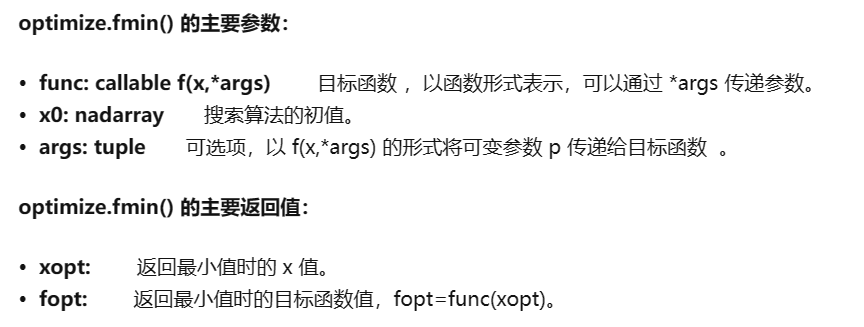

In [2]:
# 2. Demo2：多变量无约束优化问题(Scipy.optimize.brent)
# Rosenbrock 测试函数
def objf2(x):  # Rosenbrock benchmark function
    fx = 100.0 * (x[0] - x[1] ** 2.0) ** 2.0 + (1 - x[1]) ** 2.0
    return fx


xIni = np.array([-2, -2])
xOpt = fmin(objf2, xIni)
print("xIni={:.4f},{:.4f}\tfxIni={:.4f}".format(xIni[0], xIni[1], objf2(xIni)))
print("xOpt={:.4f},{:.4f}\tfxOpt={:.4f}".format(xOpt[0], xOpt[1], objf2(xOpt)))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 149
xIni=-2.0000,-2.0000	fxIni=3609.0000
xOpt=1.0000,1.0000	fxOpt=0.0000


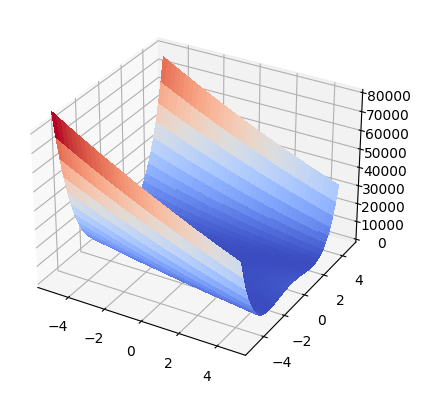

In [3]:

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

x1 = np.arange(-5, 5, 0.25)
y1 = np.arange(-5, 5, 0.25)
x1, y1 = np.meshgrid(x1, y1)
z1 = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        z1[i, j] = objf2([x1[i, j], y1[i, j]])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#绘制曲面图
ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm, linewidth=0,
                antialiased=False)
#设置z轴刻度的范围、位置、格式
ax.set_zlim(0, 80000)
plt.show()

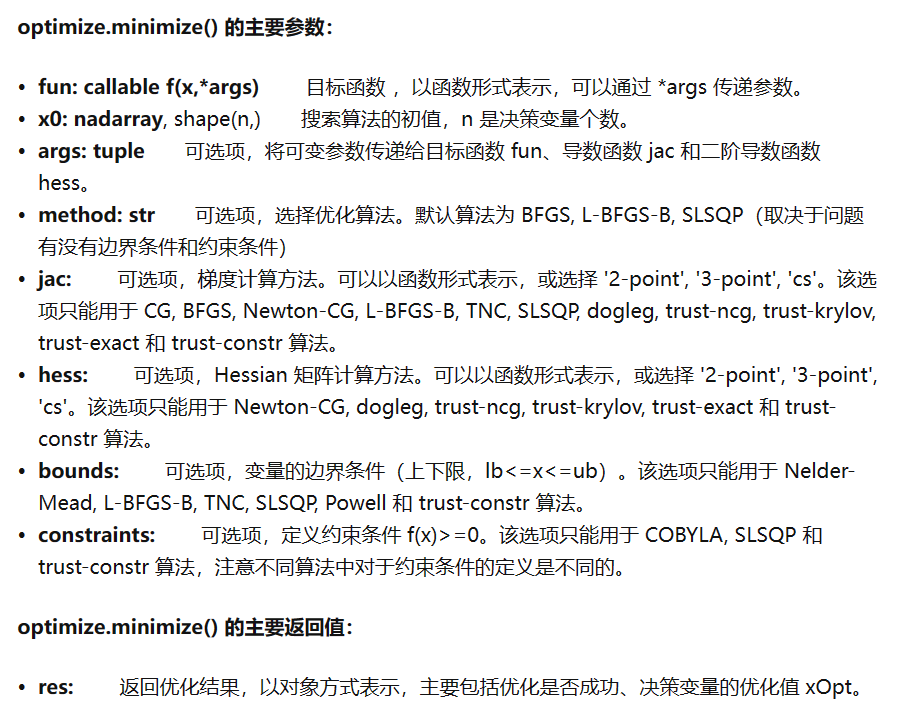

In [4]:
# 3. Demo3：多变量边界约束优化问题(Scipy.optimize.minimize)
#目标函数：
def func(args):
    fun = lambda x: 60 - 10 * x[0] - 4 * x[1] + x[0] ** 2 + x[1] ** 2 - x[0] * x[1]
    return fun


#约束条件，包括等式约束和不等式约束
def con(args):
    cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] - 8})
    return cons


# 解决问题是：当x1+x2=8时，求解函数60-10x1-4x2+x1^2+x2^2-x1x2的极小值

if __name__ == "__main__":
    args = ()
    args1 = ()
    cons = con(args1)
    x0 = np.array((2.0, 1.0))  #设置初始值，初始值的设置很重要，很容易收敛到另外的极值点中，建议多试几个值

    #求解#
    res = minimize(func(args), x0, method='SLSQP', constraints=cons)
    print(res)


     fun: 17.000000000000007
     jac: array([-3.        , -2.99999928])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([4.99999994, 3.00000006])


In [5]:
# 4. Demo4：约束非线性规划问题(Scipy.optimize.minimize)
def objF4(x):  # 定义目标函数
    a, b, c, d = 1, 2, 3, 8
    fx = a * x[0] ** 2 + b * x[1] ** 2 + c * x[2] ** 2 + d
    return fx


# 定义约束条件函数
def constraint1(x):  # 不等式约束 f(x)>=0
    return x[0] ** 2 - x[1] + x[2] ** 2


def constraint2(x):  # 不等式约束 转换为标准形式
    return -(x[0] + x[1] ** 2 + x[2] ** 3 - 20)


def constraint3(x):  # 等式约束
    return -x[0] - x[1] ** 2 + 2


def constraint4(x):  # 等式约束
    return x[1] + 2 * x[2] ** 2 - 3


# 定义边界约束
b = (0.0, None)
bnds = (b, b, b)

# 定义约束条件
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'ineq', 'fun': constraint2}
con3 = {'type': 'eq', 'fun': constraint3}
con4 = {'type': 'eq', 'fun': constraint4}
cons = ([con1, con2, con3, con4])  # 3个约束条件

# 求解优化问题
x0 = np.array([1., 2., 3.])  # 定义搜索的初值
res = minimize(objF4, x0, method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res):\t{}".format(res.message))  # 优化是否成功
print("xOpt = {}".format(res.x))  # 自变量的优化值
print("min f(x) = {:.4f}".format(res.fun))  # 目标函数的优化值

Optimization problem (res):	Optimization terminated successfully
xOpt = [0.6743061  1.15138781 0.96140839]
min f(x) = 13.8790


In [24]:
# 5. Demo5：约束非线性规划问题(Scipy.optimize.minimize)
def objF5(x, args):  # 定义目标函数
    a, b, c, d = args
    fx = lambda x: a * x[0] ** 2 + b * x[1] ** 2 + c * x[2] ** 2 + d
    return a * x[0] ** 2 + b * x[1] ** 2 + c * x[2] ** 2 + d


def constraint1():  # 定义约束条件函数
    cons = ({'type': 'ineq', 'fun': lambda x: (x[0] ** 2 - x[1] + x[2] ** 2)},  # 不等式约束 f(x)>=0
            {'type': 'ineq', 'fun': lambda x: -(x[0] + x[1] ** 2 + x[2] ** 3 - 20)},  # 不等式约束 转换为标准形式
            {'type': 'eq', 'fun': lambda x: (-x[0] - x[1] ** 2 + 2)},  # 等式约束
            {'type': 'eq', 'fun': lambda x: (x[1] + 2 * x[2] ** 2 - 3)})  # 等式约束
    return cons


# 定义边界约束
b = (0.0, None)
bnds = (b, b, b)
# 定义约束条件
cons = constraint1()
args1 = (1, 2, 3, 8)  # 定义目标函数中的参数
# 求解优化问题
x0 = np.array([1., 2., 3.])  # 定义搜索的初值
res1 = minimize(objF5, x0=x0, args=[1, 2, 3, 8], method='SLSQP', bounds=bnds, constraints=cons)

print("Optimization problem (res1):\t{}".format(res1.message))  # 优化是否成功
print("xOpt = {}".format(res1.x))  # 自变量的优化值
print("min f(x) = {:.4f}".format(res1.fun))  # 目标函数的优化值

Optimization problem (res1):	Optimization terminated successfully
xOpt = [0.6743061  1.15138781 0.96140839]
min f(x) = 13.8790


In [16]:
## Demo.6. 蒙特卡洛方法
from numpy import random as rd

N = 1000000
x2 = rd.uniform(10, 20.1, N)
x1 = x2 + 10
x3 = rd.uniform(-5, 16, N)
f = float('-inf')
for i in range(N):
    if -x1[i] + 2 * x2[i] + 2 * x3[i] >= 0 and x1[i] + 2 * x2[i] + 2 * x3[i] <= 72:
        result = x1[i] * x2[i] * x3[i]
        if result > f:
            f = result
            final_X = [x1[i], x2[i], x3[i]]

print("""最终得出的最大目标函数值为：%.4f
最终自变量取值为：
x1 = %.4f
x2 = %.4f
x3 = %.4f""" % (f, final_X[0], final_X[1], final_X[2]))


最终得出的最大目标函数值为：3445.4292
最终自变量取值为：
x1 = 22.5209
x2 = 12.5209
x3 = 12.2187
